# Distribution of High - Low - Analytics

### Import Library

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [2]:
import os
from pathlib import Path
notebook_path = os.getcwd()
current_dir = Path(notebook_path)
csv_file = str(current_dir) + '/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [3]:
data = dataset.copy()

In [4]:
daily_data = data.copy().resample('D').agg({
        'Volume': 'sum',
        'Open': 'first',
        'Close': 'last',
        'High': 'max',
        'Low': 'min'
    })
daily_data.dropna(subset=['Close'], inplace=True)

In [5]:
dfd = daily_data[['High', 'Low']].copy().rename(columns={'High': 'day_High', 'Low': 'day_Low'})
df1 = data.copy()
df1 = df1.assign(time_d=pd.PeriodIndex(df1.index, freq='1D').to_timestamp())
df_merged = pd.merge(df1, dfd, left_on="time_d", right_index=True, how="left")
df_merged['is_max'] = df_merged['High'] == df_merged['day_High']
df_merged['is_min'] = df_merged['Low'] == df_merged['day_Low']
df_merged['hour'] = df_merged.index.hour
df_merged['minute'] = df_merged.index.minute
analytics_data = df_merged[(df_merged.is_max == True) | (df_merged.is_min == True)]

<Axes: xlabel='hour'>

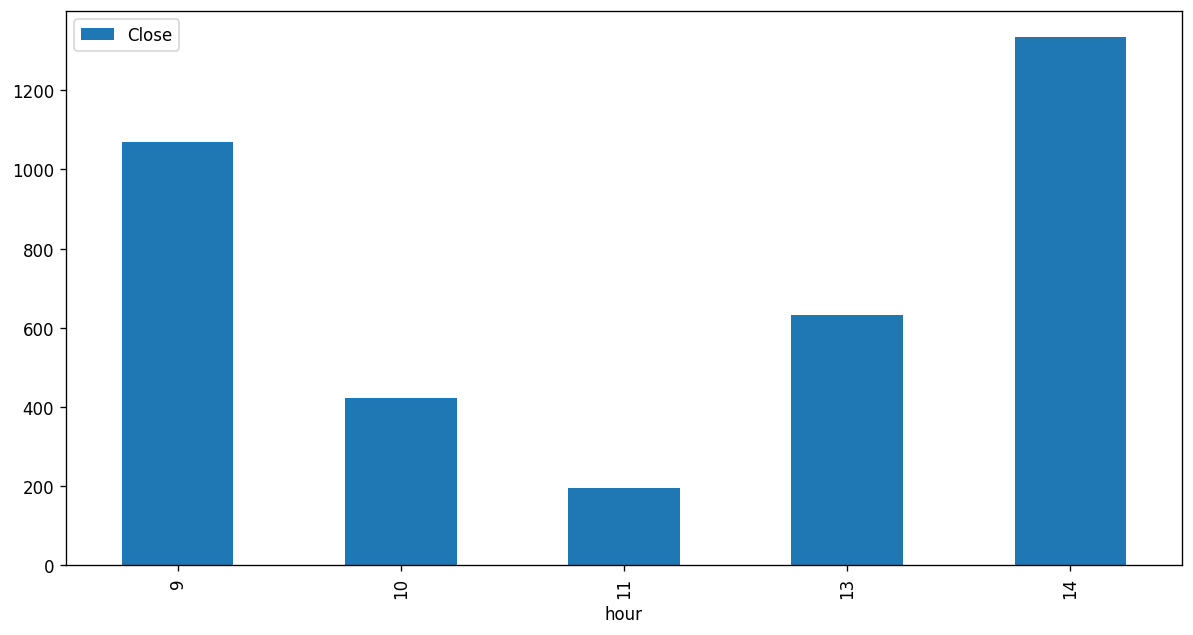

In [6]:
analytics_data_grouped_by_hour = analytics_data.groupby(['hour'])[['Close']].count()
analytics_data_grouped_by_hour.plot.bar()

<Axes: xlabel='hour'>

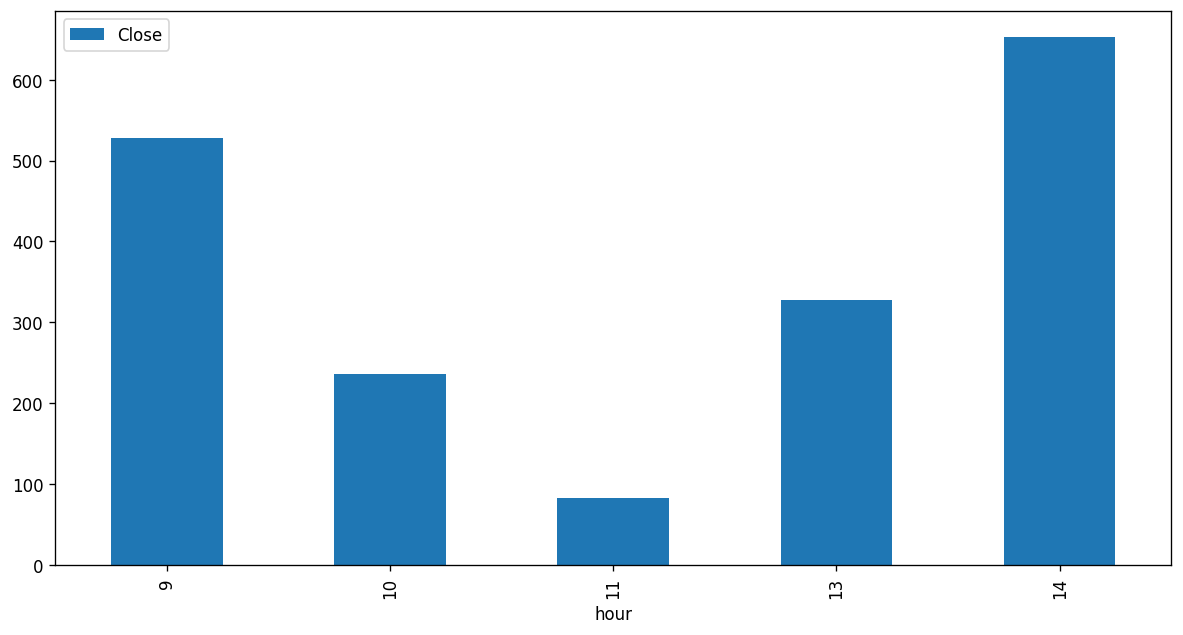

In [7]:
max_data = analytics_data[analytics_data.is_max == True]
max_data_grouped_by_hour = max_data.groupby(['hour'])[['Close']].count()
max_data_grouped_by_hour.plot.bar()

<Axes: xlabel='hour'>

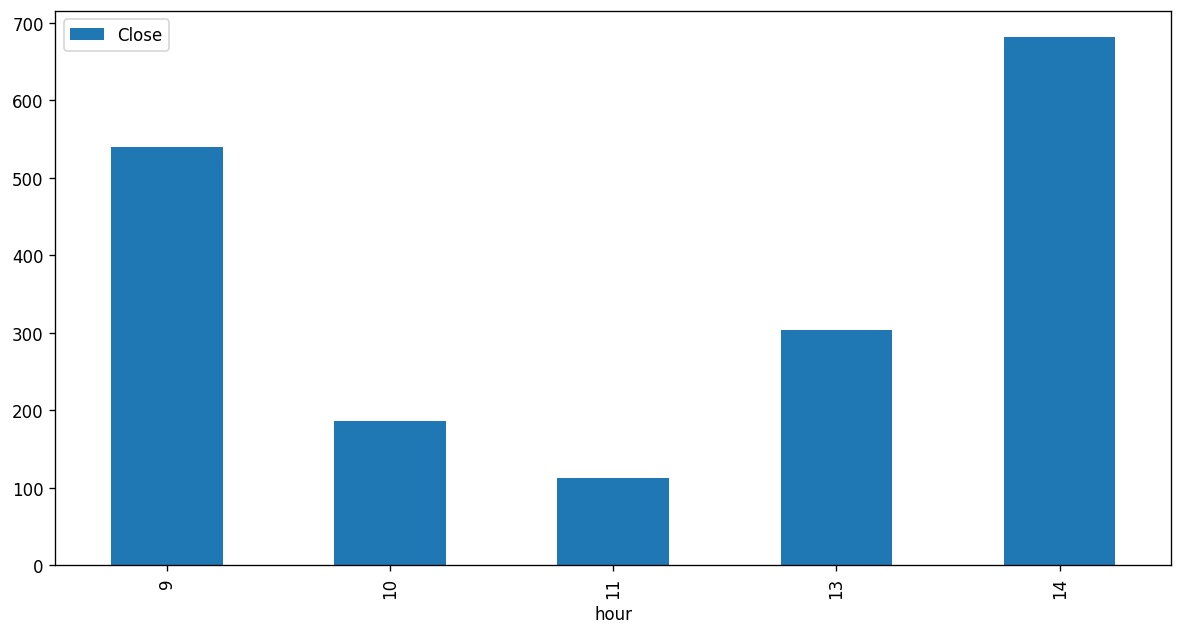

In [8]:
min_data = analytics_data[analytics_data.is_min == True]
min_data_grouped_by_hour = min_data.groupby(['hour'])[['Close']].count()
min_data_grouped_by_hour.plot.bar()